# Processed Data Analysis: Tertiary Education Attainment by Country
### **DONT FORGET TO FILL THIS PART IN!!!**
This notebook ...

## Step 1: Import Libraries & Load Clean Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../data/tertiary_clean.csv")

## Step 2: Overall Trends in Tertiary Education

In [60]:
# function calc_avg(df, metric, avg_type)
# - df = dataframe
# - metric = lh or lhc
# - avg_type = mean, median, or weighted_mean
def calc_avg(df, metric, avg_type):
    # group by year
    grouped = df.groupby("year")
    # calculate avg_type of metric
    if avg_type == "mean":
        result = grouped[metric].mean()
    elif avg_type == "median":
        result = grouped[metric].median()
    elif avg_type == "weighted_mean":
        result = grouped.apply(lambda x: np.average(x[metric], weights=x["pop"]), include_groups=False)
    else: # give error if avg_type is not supported
        raise ValueError("avg_type must be 'mean', 'median', or 'weighted_mean'")
    # return clean result
    return result.reset_index(name=metric)

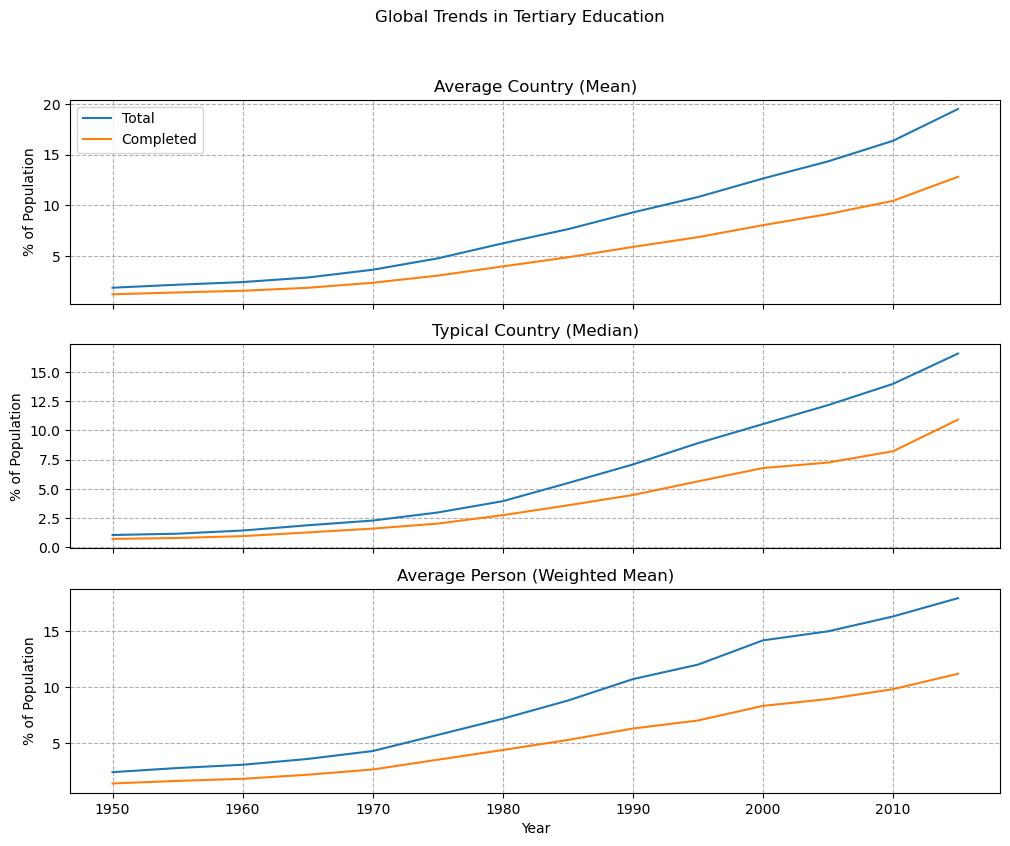

In [66]:
# 6 lines of code saving into variables calc_avg for every metric and avg_type
# then plotting 3 graphs (vertically, shared x-axis) of the three metrics over time
# Compute average values
mean_lh = calc_avg(df, "lh", "mean")
mean_lhc = calc_avg(df, "lhc", "mean")
median_lh = calc_avg(df, "lh", "median")
median_lhc = calc_avg(df, "lhc", "median")
wmean_lh = calc_avg(df, "lh", "weighted_mean")
wmean_lhc = calc_avg(df, "lhc", "weighted_mean")

# Plot
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

# Mean
axes[0].plot(mean_lh["year"], mean_lh["lh"], label="Total")
axes[0].plot(mean_lhc["year"], mean_lhc["lhc"], label="Completed")
axes[0].set_title("Average Country (Mean)")
axes[0].set_ylabel("% of Population")
axes[0].legend()
axes[0].grid(linestyle="--")
# Median
axes[1].plot(median_lh["year"], median_lh["lh"])
axes[1].plot(median_lhc["year"], median_lhc["lhc"])
axes[1].set_title("Typical Country (Median)")
axes[1].set_ylabel("% of Population")
axes[1].grid(linestyle="--")
# Weighted mean
axes[2].plot(wmean_lh["year"], wmean_lh["lh"], label="Total")
axes[2].plot(wmean_lhc["year"], wmean_lhc["lhc"], label="Completed")
axes[2].set_title("Average Person (Weighted Mean)")
axes[2].set_ylabel("% of Population")
axes[2].grid(linestyle="--")

plt.xlabel("Year")
fig.suptitle("Global Trends in Tertiary Education")
plt.show()

### **ANALYSIS**
<u>Population with Tertiary Education for Average Country (Mean)</u>

Observations:
- Steady growth in both total and completed tertiary education rates.
- The total percentage rose from around 2% to nearly 20% from 1950 to 2015.
- The completed percentage rose more slowly, so the gap between those who have attended and those who have completed tertiary education has widened slightly over time.

Implications:
- On average, countries globally have improved their higher education access.
- Completion rates are also rising, but not as quickly as attendance.
- The growing gap suggests that many students start tertiary education but do not finish.

<u>Population with Tertiary Education for Typical Country (Median)</u>

Observations:
- Lower overall percentages than the mean, indicating many countries are below the average.
- There is a sharper rise in education rates since the 1980s.
- Despite the initial values in 1950 starting lower than in the mean graph, the final values in 2015 are slightly below those in the mean graph.
- The gap between total and completed tertiary education remains visible and grows over time, similar to the first graph.

Implications:
- Some countries are high-performing and drive up the average.
- The typical country had slower start and lower initial growth in tertiary education than the mean suggests.
- Despite the late start, the typical country shows strong growth after 1980, approaching the levels seen in the mean.
- As seen previously, while the access to tertiary education has expanded, many people still do not complete it.

<u>Population with Tertiary Education for Average Person (Weighted Mean)</u>

Observations:
- Values are closer to the mean than to the median, but slightly lower than the mean.
- The gap between total and completed tertiary education remains wide (about 6-7 percentage points), which closely matches the mean panel and is larger the in the median panel (about 4 percentage points).
- From the mid-90s onwards, the blue line (total) almost overlaps the mean panel's blue line, whereas the orange line (completed) stays below the mean panel's orange line.
- By 2015, roughly 18% of the global population had accessed tertiary education, with about 11% completing it.

Implications:
- Access to tertiary education for the average person has caught up to the average country level, confirming that higher education is reaching a large portion of humanity, not just a large number of countries.
- Degree completion has not kept pace with degree access: there seems to be a difficulty converting enrolment into graduation.
- Tertiary education access and completion remain limited in absolute terms, with fewer than 1 in 5 people globally attending, and just over 1 in 10 completing, by 2015.

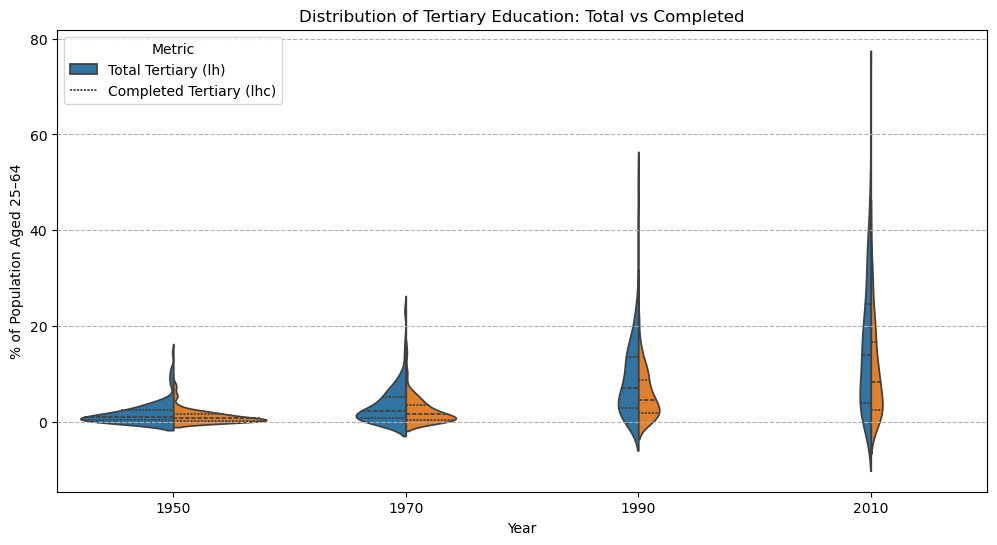

In [20]:
# Filter milestone years only (less clutter)
milestone_years = [1950, 1970, 1990, 2010]
df_sample = df[df["year"].isin(milestone_years)]

# Reshape to long format (necessary for side-by-side violin plots)
df_long = pd.melt(df_sample,
                  id_vars=["country", "year"],
                  value_vars=["lh", "lhc"],
                  var_name="metric",
                  value_name="value")

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long, x="year", y="value", hue="metric", split=True, inner="quart")
plt.title("Distribution of Tertiary Education: Total vs Completed")
plt.ylabel("% of Population Aged 25–64")
plt.xlabel("Year")
plt.legend(title="Metric", labels=["Total", "Completed"])
plt.grid(axis="y", linestyle="--")
plt.show()

### **ANALYSIS**
Observations:
- Clear growth over time in both total and completed tertiary education (as discussed previously).
- Distribution expanding over the years: at first distributions are relatively low and tight, but increase largely, with some countries acheiving or exceeding 60% population with total tertiary education.
- The gap between total and completed tertiary education increases over time (as discussed previously).
- The median and quartiles gradually increase over time, with the distributions increasingly skewing right (many countries have low attainment, but a few have very high levels, pulling the upper tail upward). 

Implications:
- Higher tertiary education attainment over time.
- Increasing educational inequality or divergence between countries.
- Persistent challenges in completion rates.
- Large and growing disparities between countries, with a few countries achieving very high levels of population percentage with total and completed tertiary education.

## Step 3: Year-over-Year Change

In [ ]:
# group by country
# calculate annual rate of change
# find which countries have improved the fastest (and slowest), as well as when improvements have sped up or slowed down

### **ANALYSIS**
...

## Step 4: Regional or Grouped Comparisons 

In [ ]:
# group countries by development status? by continent? by something significant/relevant
# compare average education rates over time (like step 2) and average rates of change over time (like step 3)

### **ANALYSIS**
...

## Step 5: Top and Bottom Performers

In [ ]:
# simply display the countries with the highest, lowest, fastest-growing, and slowest-growing education attainment (basically finding the min/max data points from steps 2 & 3)
# bar chart for ranking? scatter plots with highlighted data points?

### **ANALYSIS**
...

## (maybe) Step 6: Forecasting Trends

In [ ]:
# forecast tertiary education attainment until 2030 (probably only average, no specific case)
# (maybe also regional/grouped like in step 4 if there are clear differences)

### **ANALYSIS**
...

## Step 7: Key Insights and Takeaways

TODO:
- summarise insights from previous steps into KEY insights
- declare data points that stand out and convergence/divergence between countries
- future investigation

## (maybe) Step 8: Save Figures

In [ ]:
# if i want to use any of this for a dashboard or a report or a future project (like involving GDP, yearly flights, average temperatures, idk)